<a href="https://colab.research.google.com/github/Xpliktcute/PUBHDATA/blob/main/Data_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the readr package if you don't have it already
if (!require("readr")) install.packages("readr")

# Load the readr package
library(readr)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Check the class of the object
class(mydata)

# View the first few rows
head(mydata)

Loading required package: readr



[1] "data.frame"

,ID,INTAKET,ZIPCODE,INSURANC,FEE,GENDER,RACE,AGE,SEXORIEN,STATEGRANT,⋯,AXISIII3,AXISIII4,AXISIV1,AXISIV2,AXISIV3,AXISV,TXPLAN1,TXPLAN2,TXPLAN3,TXPLAN4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,131,1,21,1,0,1,1,41,1,1,⋯,1,1,11,1,1,68,999,888,888,888
2,221,5,38,1,80,1,1,26,1,0,⋯,1,1,6,14,1,50,999,888,888,888
3,231,7,11,1,0,1,1,34,1,0,⋯,1,1,5,1,1,65,19,888,888,888
4,135,11,57,1,130,1,1,35,1,0,⋯,1,1,1,1,1,80,16,888,888,888
5,111,3,42,1,80,1,1,28,1,999,⋯,1,1,4,1,1,51,12,888,888,888
6,142,2,25,1,80,1,1,31,1,1,⋯,1,1,15,1,1,53,12,888,888,888


In [ ]:
# Load the data
mydata <- read.csv("LGBTData.csv")

# Load packages
library(dplyr)
library(ggplot2)

# Check the structure of the data
str(mydata)

# Data management of the dataset below

# Replace common missing value codes with NA (revisions based on codebook)
mydata[mydata == 888 | mydata == 999 | mydata == -9 | mydata == -8] <- NA

# Recode DEP (Depressed Mood at Intake: 0 = No, 1 = Mild, 2 = Moderate, 3 = Severe)
mydata$DEP <- factor(mydata$DEP,
                     levels = c(0, 1, 2, 3),
                     labels = c("No symptoms", "Mild", "Moderate", "Severe"))
mydata$PHYABUSE <- factor(mydata$PHYABUSE,
                          levels = c(0, 1),
                          labels = c("No", "Yes"))
mydata$SEXABUSE <- factor(mydata$SEXABUSE, levels = c(0, 1), labels = c("No", "Yes"))
mydata$EMOABUSE <- factor(mydata$EMOABUSE, levels = c(0, 1), labels = c("No", "Yes"))
mydata$DRUGEVER <- factor(mydata$DRUGEVER, levels = c(0, 1), labels = c("No", "Yes"))
mydata$PREVMH <- factor(mydata$PREVMH, levels = c(0, 1), labels = c("No", "Yes"))

# Recode relevant variables
mydata$RACE <- factor(mydata$RACE,
                      levels = c(1, 2, 3, 4, 5),
                      labels = c("White", "Hispanic", "Asian", "Black", "Undetermined"))

mydata$EMPLOY <- factor(mydata$EMPLOY,
                        levels = c(0, 1, 999),
                        labels = c("No", "Yes", "Unknown"))

mydata$SEXORIEN <- factor(mydata$SEXORIEN,
                          levels = c(1, 3),
                          labels = c("Gay", "Bisexual"))

mydata$HIVSTAT <- factor(mydata$HIVSTAT,
                         levels = c(0, 1, 2),
                         labels = c("Negative", "Positive", "Unknown"))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	148 obs. of  117 variables:
 $ ID         : int  131 221 231 135 111 142 202 102 172 128 ...
 $ INTAKET    : int  1 5 7 11 3 2 11 8 12 16 ...
 $ ZIPCODE    : int  21 38 11 57 42 25 3 51 51 25 ...
 $ INSURANC   : int  1 1 1 1 1 1 1 1 0 1 ...
 $ FEE        : int  0 80 0 130 80 80 150 165 80 80 ...
 $ GENDER     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ RACE       : int  1 1 1 1 1 1 1 1 5 1 ...
 $ AGE        : int  41 26 34 35 28 31 43 47 55 31 ...
 $ SEXORIEN   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ STATEGRANT : int  1 0 0 0 999 1 0 0 0 0 ...
 $ LIVEWITH   : int  1 999 999 2 999 999 999 2 999 3 ...
 $ RELATION   : int  4 999 999 1 1 1 1 1 999 4 ...
 $ RELALANG   : int  999 888 888 999 999 999 999 999 888 999 ...
 $ CHILDREN   : int  0 0 999 0 0 0 0 1 999 0 ...
 $ UNDER18    : int  888 888 888 888 888 888 888 2 888 888 ...
 $ EMPLOY     : int  0 0 1 1 1 1 1 1 1 1 ...
 $ PROB1      : int  1 1 2 20 4 4 4 999 1 1 ...
 $ PROB2      : int  888 2 35 888 888 888 888 888 4 13 ...
 $ PROB3      :

In [ ]:
# Age Summary
summary(mydata$AGE)
mean(mydata$AGE, na.rm = TRUE)
sd(mydata$AGE, na.rm = TRUE)

# Categorical frequencies
demo_vars <- c("RACE", "EMPLOY", "SEXORIEN", "HIVSTAT")
for (var in demo_vars) {
  cat("\n=== ", var, " ===\n")
  print(table(mydata[[var]], useNA = "ifany"))
  print(round(prop.table(table(mydata[[var]], useNA = "ifany")) * 100, 1))
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   36.00   42.79   41.25  999.00 

[1] 42.79054

[1] 79.60346


===  RACE  ===

  1   2   3   4   5 
109   8   2   7  22 

   1    2    3    4    5 
73.6  5.4  1.4  4.7 14.9 

===  EMPLOY  ===

  0   1 999 
 30 106  12 

   0    1  999 
20.3 71.6  8.1 

===  SEXORIEN  ===

  1   3 
142   6 

   1    3 
95.9  4.1 

===  HIVSTAT  ===

 0  1  2 
40 56 52 

   0    1    2 
27.0 37.8 35.1 


In [ ]:
# Recode AGE into categories
mydata$AGE_GROUP <- cut(mydata$AGE,
                        breaks = c(17, 29, 39, 49, 59, Inf),
                        labels = c("18–29", "30–39", "40–49", "50–59", "60+"),
                        right = TRUE)

# Frequency and percentage table
age_table <- table(mydata$AGE_GROUP, useNA = "ifany")
age_percent <- round(prop.table(age_table) * 100, 1)

# Combine into a data frame for clean output
age_summary <- data.frame(
  AgeGroup = names(age_table),
  N = as.vector(age_table),
  Percent = paste0(age_percent, "%")
)

print(age_summary)


  AgeGroup  N Percent
1    18–29 34     23%
2    30–39 66   44.6%
3    40–49 34     23%
4    50–59 13    8.8%
5      60+  1    0.7%


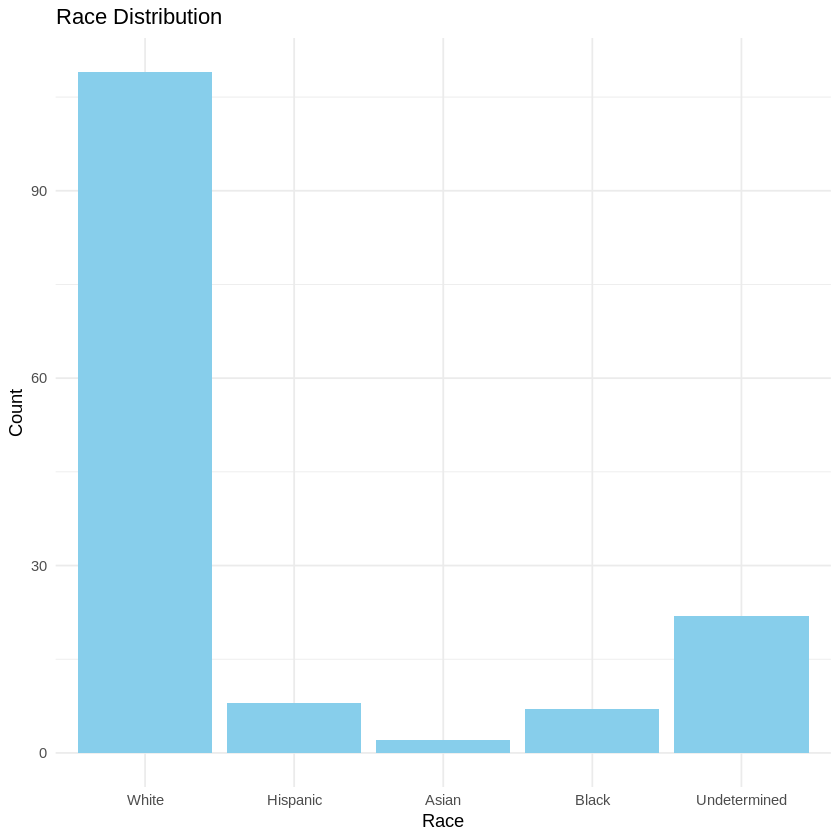

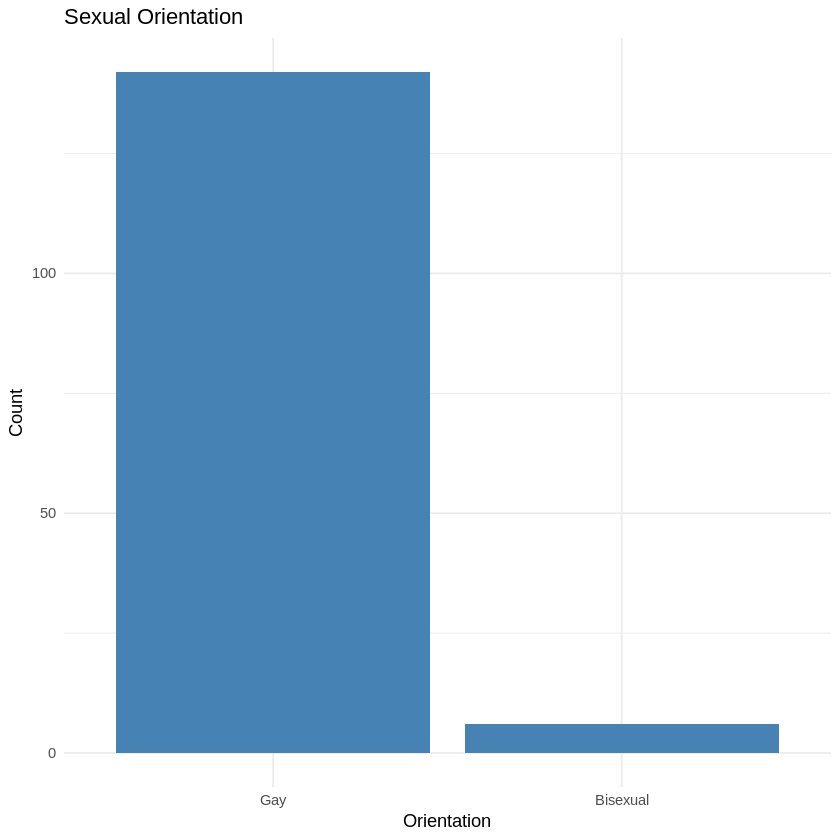

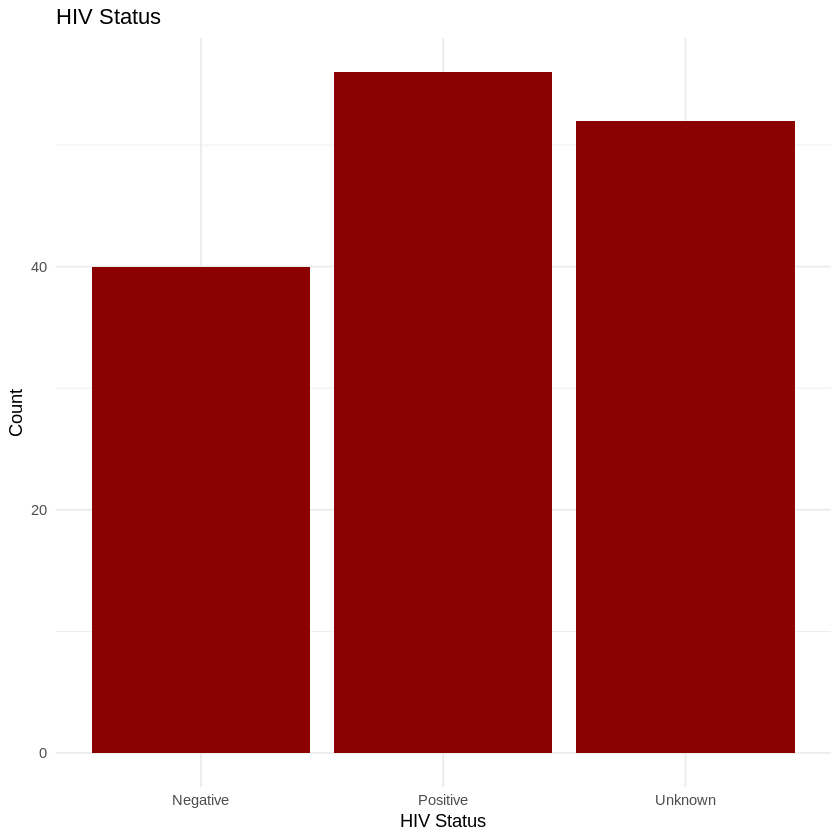

In [ ]:
ggplot(mydata, aes(x = RACE)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Race Distribution", x = "Race", y = "Count") +
  theme_minimal()

ggplot(mydata, aes(x = SEXORIEN)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Sexual Orientation", x = "Orientation", y = "Count") +
  theme_minimal()

ggplot(mydata, aes(x = HIVSTAT)) +
  geom_bar(fill = "darkred") +
  labs(title = "HIV Status", x = "HIV Status", y = "Count") +
  theme_minimal()

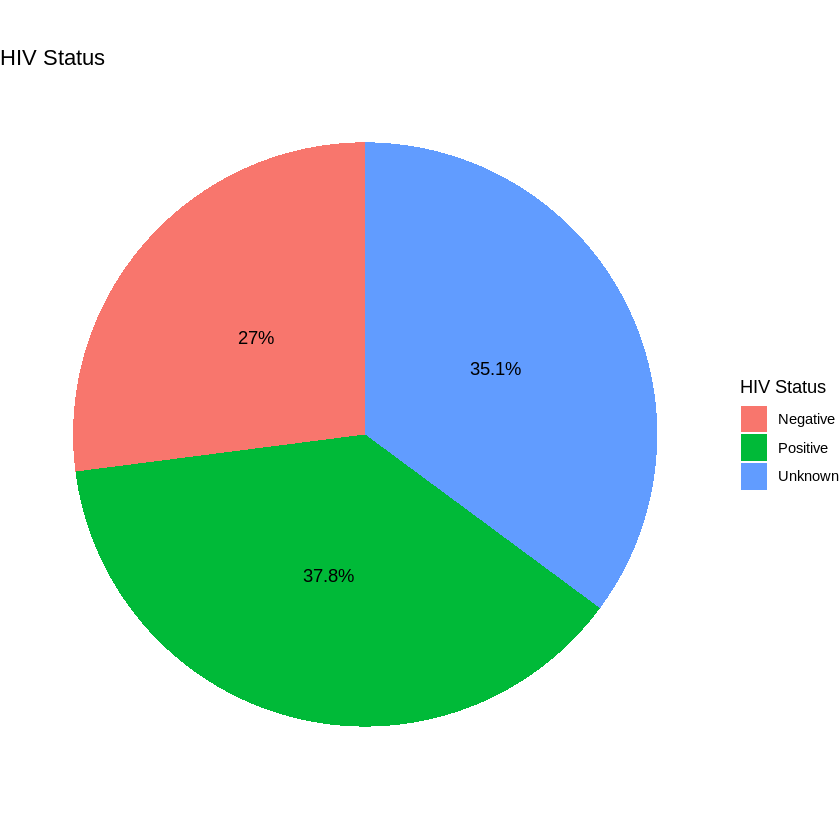

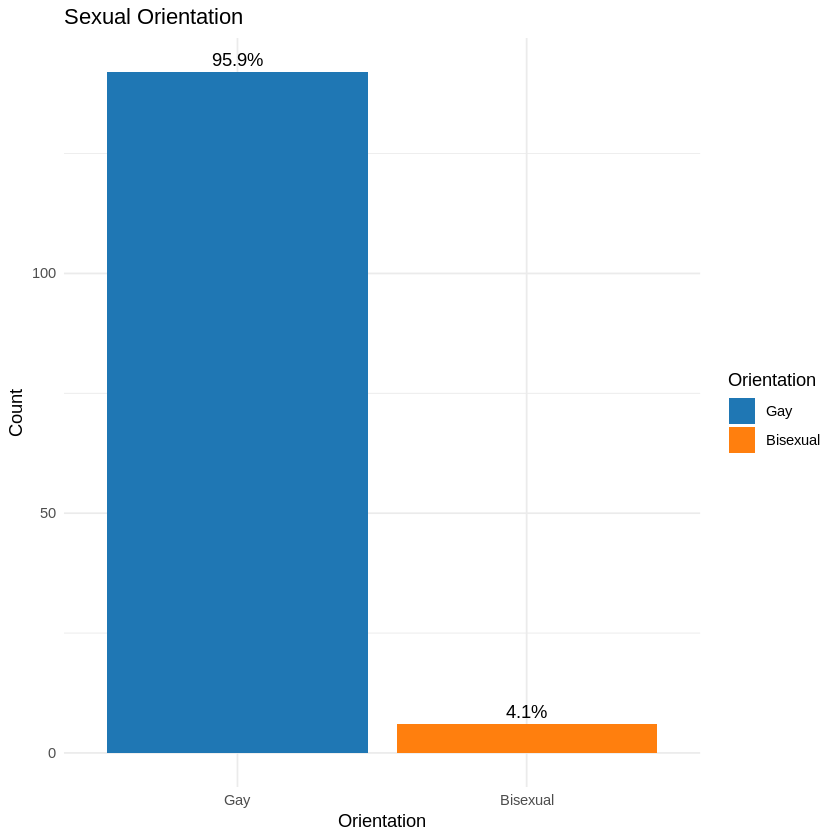

In [ ]:
# Assuming 'mydata' and 'HIVSTAT' are already defined

# Create a frequency table for HIV status
hiv_freq <- table(mydata$HIVSTAT)

# Convert to data frame
hiv_df <- as.data.frame(hiv_freq)
colnames(hiv_df) <- c("HIVSTAT", "Freq")

# Calculate percentage
hiv_df$Percentage <- round(hiv_df$Freq / sum(hiv_df$Freq) * 100, 1)

# Create pie chart with percentage labels
ggplot(hiv_df, aes(x = "", y = Freq, fill = HIVSTAT)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(Percentage, "%")),
            position = position_stack(vjust = 0.5)) + # Add percentage labels
  labs(title = "HIV Status", fill = "HIV Status") +
  theme_void()

# Assuming 'mydata' and 'SEXORIEN' are already defined

# Calculate frequencies and percentages
sexorien_df <- mydata %>%
  group_by(SEXORIEN) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count / sum(Count) * 100, 1))

# Create bar chart with percentage labels and custom colors
ggplot(sexorien_df, aes(x = SEXORIEN, y = Count, fill = SEXORIEN)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(Percentage, "%")),
            position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = "Sexual Orientation", x = "Orientation", y = "Count", fill = "Orientation") +
  theme_minimal() +
  scale_fill_manual(values = c("Gay" = "#1f77b4", "Bisexual" = "#ff7f0e")) # Custom colors

In [ ]:
# From here we are hoping to see the most frequent presenting problems among the popuation
# Combine into one long column
all_probs <- c(mydata$PROB1, mydata$PROB2, mydata$PROB3)

# Remove invalid codes
all_probs <- all_probs[!is.na(all_probs) & all_probs != 888 & all_probs != 999]

# Count frequency
prob_table <- table(all_probs)
prob_percent <- round(prop.table(prob_table) * 100, 1)

# Create data frame
problem_summary <- data.frame(
  ProblemCode = as.numeric(names(prob_table)),
  Count = as.vector(prob_table),
  Percent = paste0(prob_percent, "%")
)


In [ ]:
# Define labels from codebook to see how
problem_labels <- c(
  "Depression", "Anxiety", "Panic attacks", "Relationship issues", "Intimacy issues",
  "Sexual compulsivity", "Weight issues", "Self-esteem", "Legal problems", "Trauma",
  "Loss", "Transgender/gender identity", "Isolation", "Stress", "Sleep problems", "Vocational problems",
  "Interpersonal issues", "Sexual dysfunction", "Anger/attacks", "Medical", "Attention/hyperactivity",
  "Eating disorders", "Bipolar", "Substance abuse", "Suicide attempt", "Lack of pleasure",
  "No interest in sex", "Eating problems", "Irritability", "Recent recovery", "Stressful living situation",
  "HIV+ issues", "Schizoaffective disorder", "Family issues", "Coming out issues", "Obsessions/compulsions",
  "Hypervigilance", "Guilt", "Work stress", "Lack of energy", "Concentration problems", "Fear of rejection",
  "Self-criticism", "Aging issues", "Internalized homophobia", "Recent move", "Tremors", "Abuse",
  "Authority issues", "HIV disclosure", "Chronic pain", "Seizures"
)

# Add labels based on position
problem_summary$Label <- problem_labels[problem_summary$ProblemCode]

# Sort by count
problem_summary <- problem_summary[order(-problem_summary$Count), ]

# View top results
head(problem_summary, 10)

ERROR: Error: object 'problem_summary' not found


In [ ]:
# Bar chart: Presenting Problems by Prevalence
library(ggplot2)

ggplot(problem_summary, aes(x = reorder(Label, -Count), y = Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Presenting Problems at Intake",
       x = "Presenting Problem",
       y = "Number of Mentions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold", hjust = 0.5))


ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Label' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .   

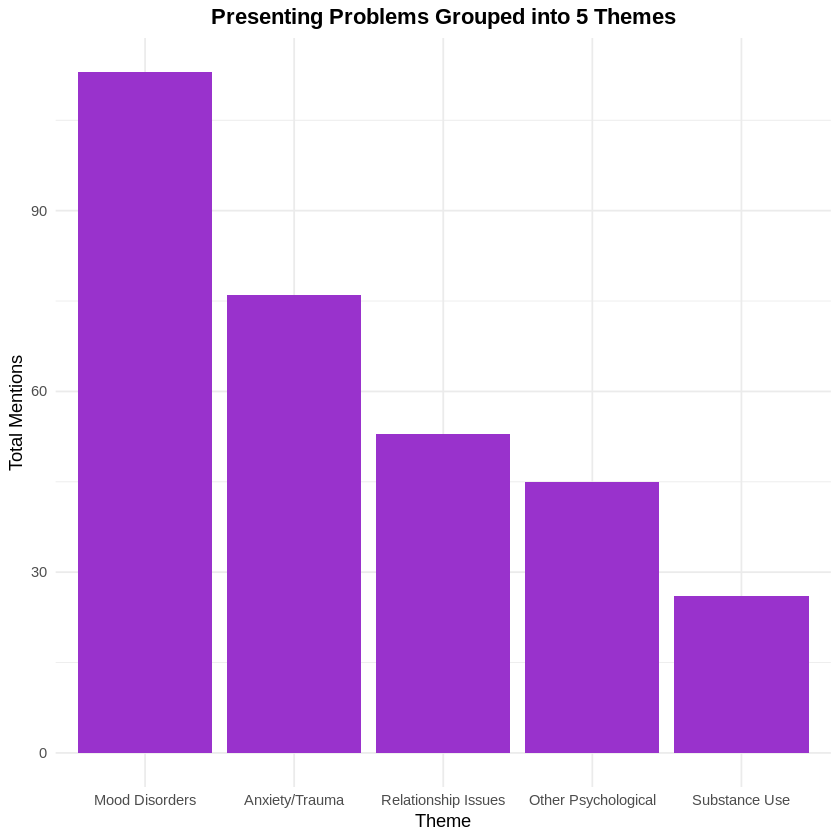

In [ ]:
# Presenting problems too many group and recode into 5 main themes

# Define mapping from ProblemCode to Theme
theme_map <- list(
  "Mood Disorders" = c(1, 11, 18, 23, 26, 27, 29, 30, 40, 41, 44, 45, 46),
  "Anxiety/Trauma" = c(2, 3, 10, 13, 14, 25, 33, 36, 37, 39),
  "Relationship Issues" = c(4, 5, 6, 12, 20, 22, 28, 34, 35),
  "Substance Use" = c(9, 17, 19, 21, 24, 31),
  "Other Psychological" = c(7, 8, 15, 16, 32, 38, 42, 43, 48, 50)
)

# Add Theme column
problem_summary$Theme <- sapply(problem_summary$ProblemCode, function(code) {
  matched <- NA
  for (theme in names(theme_map)) {
    if (code %in% theme_map[[theme]]) {
      matched <- theme
      break
    }
  }
  matched
})

# Summarize by Theme
theme_summary <- problem_summary %>%
  filter(!is.na(Theme)) %>%
  group_by(Theme) %>%
  summarise(Count = sum(Count)) %>%
  mutate(Percent = round(100 * Count / sum(Count), 1))

# Plot
ggplot(theme_summary, aes(x = reorder(Theme, -Count), y = Count)) +
  geom_bar(stat = "identity", fill = "darkorchid") +
  labs(title = "Presenting Problems Grouped into 5 Themes",
       x = "Theme",
       y = "Total Mentions") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))


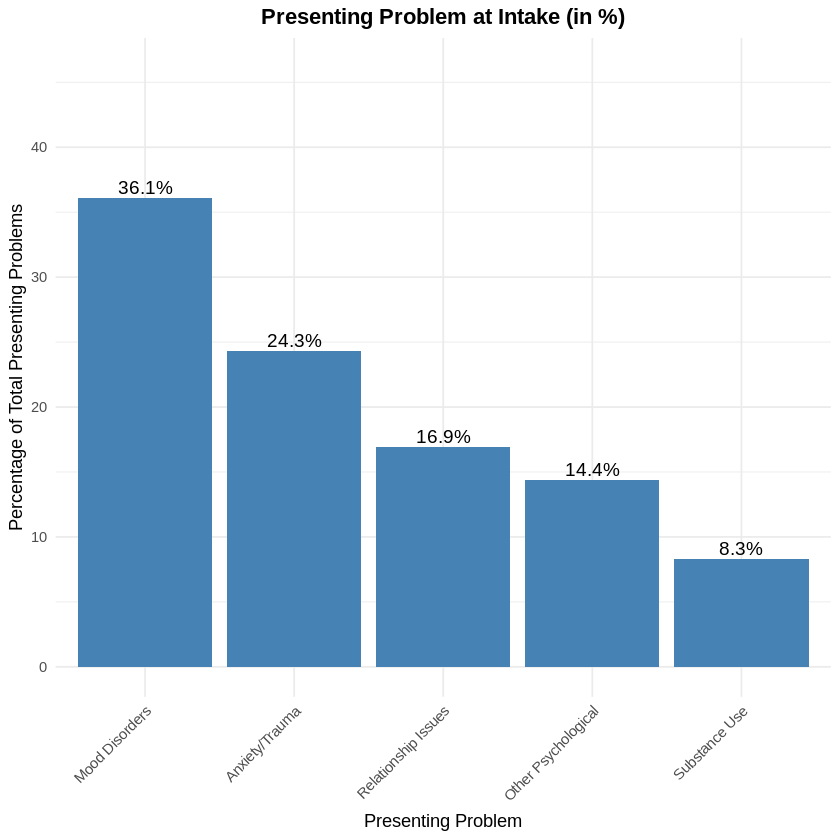

In [ ]:
# Plot percentages instead of counts
ggplot(theme_summary, aes(x = reorder(Theme, -Percent), y = Percent)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(Percent, "%")), vjust = -0.3, size = 4) +
  labs(title = "Presenting Problem at Intake (in %)",
       x = "Presenting Problem",
       y = "Percentage of Total Presenting Problems") +
  theme_minimal() +
  ylim(0, max(theme_summary$Percent) + 10) +  # Add some headroom for labels
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1))


  DepressionLevel   N Percent
1     No symptoms   0      0%
2            Mild   0      0%
3        Moderate   0      0%
4          Severe   0      0%
5            <NA> 148    100%


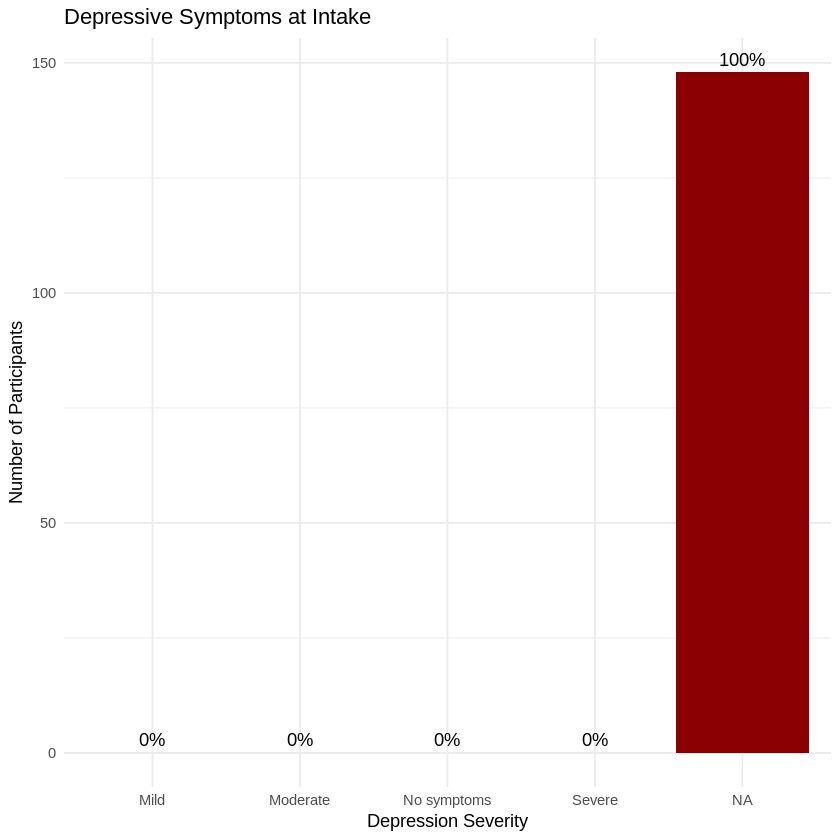

In [ ]:
mydata$DEP <- factor(mydata$DEP,
                     levels = c(0, 1, 2, 3),
                     labels = c("No symptoms", "Mild", "Moderate", "Severe"))
# Frequency table
dep_table <- table(mydata$DEP, useNA = "ifany")

# Percentage table
dep_percent <- round(prop.table(dep_table) * 100, 1)

# Combine into a data frame
dep_summary <- data.frame(
  DepressionLevel = names(dep_table),
  N = as.vector(dep_table),
  Percent = paste0(dep_percent, "%")
)

print(dep_summary)

ggplot(dep_summary, aes(x = DepressionLevel, y = N)) +
  geom_bar(stat = "identity", fill = "darkred") +
  geom_text(aes(label = paste0(Percent)), vjust = -0.5) +
  labs(title = "Depressive Symptoms at Intake",
       x = "Depression Severity",
       y = "Number of Participants") +
  theme_minimal()


In [ ]:
# Chi-square test: Sexual Orientation vs Primary Presenting Problem
table1 <- table(mydata$SEXORIEN, mydata$PROB1)
chisq.test(table1)

# Chi-square test: HIV Status vs Depression Severity
# Ensure depression variable is coded as a factor first
table2 <- table(mydata$HIVSTAT, mydata$DEP)
chisq.test(table2)

# Chi-square test: Abuse History (Physical) vs Depression
table3 <- table(mydata$PHYABUSE, mydata$DEP)
chisq.test(table3)

# Chi-square test: Emotional Abuse vs Previous Mental Health Treatment
table4 <- table(mydata$EMOABUSE, mydata$PREVMH)
chisq.test(table4)


Warning message in chisq.test(table1):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table1
X-squared = 53.243, df = 19, p-value = 4.302e-05


Warning message in chisq.test(table2):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table2
X-squared = 7.1008, df = 6, p-value = 0.3116


Warning message in chisq.test(table3):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table3
X-squared = 7.8231, df = 3, p-value = 0.04981



	Pearson's Chi-squared test with Yates' continuity correction

data:  table4
X-squared = 2.6911, df = 1, p-value = 0.1009


Warning message in chisq.test(table2):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table2
X-squared = 7.1008, df = 6, p-value = 0.3116


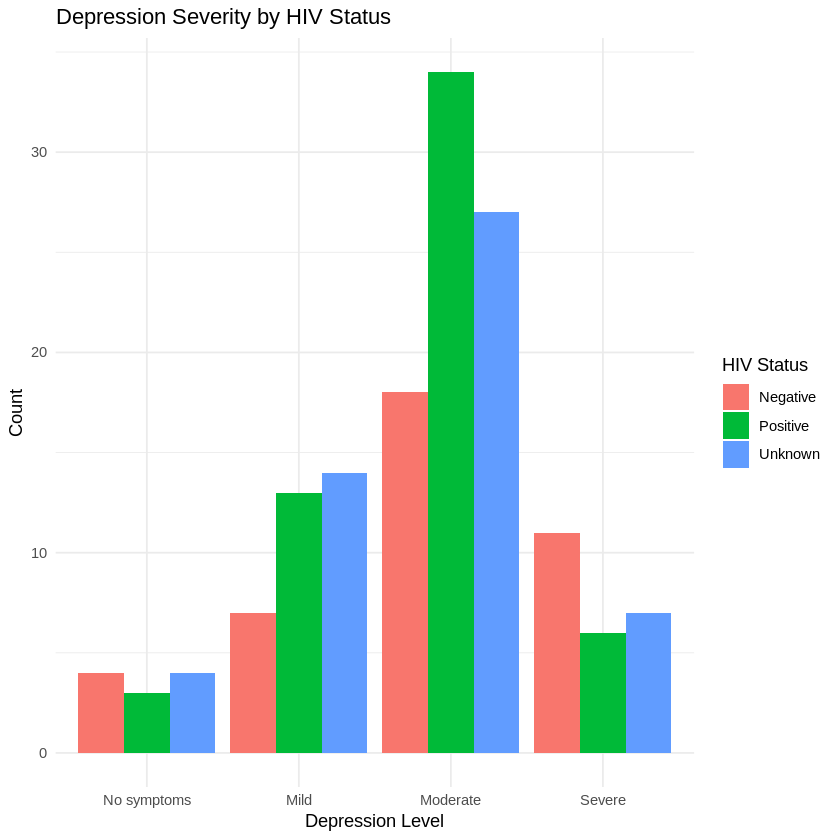

In [ ]:
# Association between HIV status and depression severity
table2 <- table(mydata$HIVSTAT, mydata$DEP)
chisq.test(table2)

# Side-by-side bar plot
library(ggplot2)
library(dplyr)

mydata %>%
  filter(!is.na(HIVSTAT) & !is.na(DEP)) %>%
  ggplot(aes(x = DEP, fill = HIVSTAT)) +
  geom_bar(position = "dodge") +
  labs(title = "Depression Severity by HIV Status",
       x = "Depression Level", y = "Count", fill = "HIV Status") +
  theme_minimal()


Warning message in chisq.test(table3):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table3
X-squared = 7.8231, df = 3, p-value = 0.04981


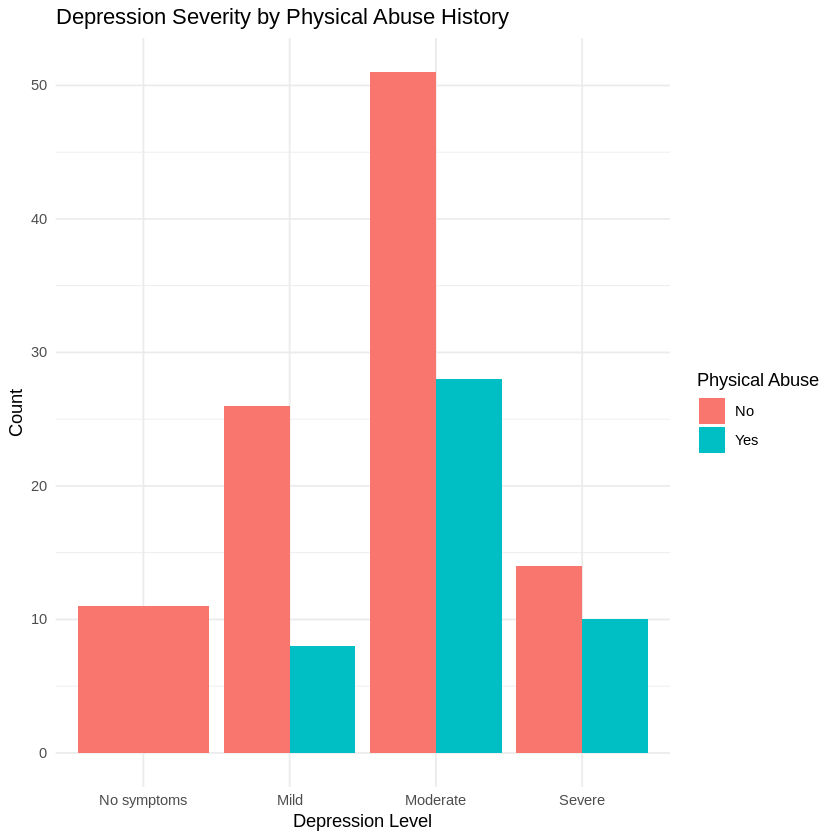

In [ ]:
# Association between physical abuse and depression severity
table3 <- table(mydata$PHYABUSE, mydata$DEP)
chisq.test(table3)

# Side-by-side bar plot
mydata %>%
  filter(!is.na(PHYABUSE) & !is.na(DEP)) %>%
  ggplot(aes(x = DEP, fill = PHYABUSE)) +
  geom_bar(position = "dodge") +
  labs(title = "Depression Severity by Physical Abuse History",
       x = "Depression Level", y = "Count", fill = "Physical Abuse") +
  theme_minimal()


In [ ]:
# Define the mapping of PROB1 codes to broader themes
theme_map <- list(
  "Mood" = c(1, 11, 23, 26),
  "Anxiety/Trauma" = c(2, 3, 10, 13),
  "Relationship" = c(4, 5, 6),
  "Substance" = c(24),
  "Other" = c(7, 8, 15, 20)
)

# Create a new column in mydata for theme based on PROB1
mydata$THEME1 <- sapply(mydata$PROB1, function(code) {
  for (group in names(theme_map)) {
    if (!is.na(code) && code %in% theme_map[[group]]) return(group)
  }
  return(NA)
})


[1] "NUMPROB column not found. Available columns:"
  [1] "ID"          "INTAKET"     "ZIPCODE"     "INSURANC"    "FEE"        
  [6] "GENDER"      "RACE"        "AGE"         "SEXORIEN"    "STATEGRANT" 
 [11] "LIVEWITH"    "RELATION"    "RELALANG"    "CHILDREN"    "UNDER18"    
 [16] "EMPLOY"      "PROB1"       "PROB2"       "PROB3"       "PROB4"      
 [21] "DRUGEVER"    "DRUGAGE"     "DRUG1"       "DRUG2"       "DRUG3"      
 [26] "DRUG4"       "DRUG5"       "PHYABUSE"    "PHYWHOM"     "SEXABUSE"   
 [31] "SEXWHOM"     "EMOABUSE"    "EMOWHOM"     "CURPHYS"     "CURSEX"     
 [36] "AGELGBT"     "MED1"        "MED1SPECIFY" "MED2"        "MED2SPECIFY"
 [41] "MED3"        "MED3SPECIFY" "MED4"        "MED4SPECIFY" "MED5"       
 [46] "MED5SPECIFY" "MEDOTHER"    "MEDADHER"    "HIVSTAT"     "DATEDX"     
 [51] "SENSE1"      "SENSE2"      "CD4"         "VIRAL"       "CD4DATE"    
 [56] "PREVMH"      "IMPATIEN"    "OUTPATIE"    "DEP"         "HYPER"      
 [61] "LOENERG"     "TRAUVIC"     "GR

Warning message in chisq.test(hiv_dep_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  hiv_dep_table
X-squared = 7.1008, df = 6, p-value = 0.3116

[1] "Substance Use History vs. Suicidal Ideation:"
     
      Not Present Ideation
  No           66       11
  Yes          56       15

	Pearson's Chi-squared test with Yates' continuity correction

data:  drug_sui_table
X-squared = 0.76811, df = 1, p-value = 0.3808



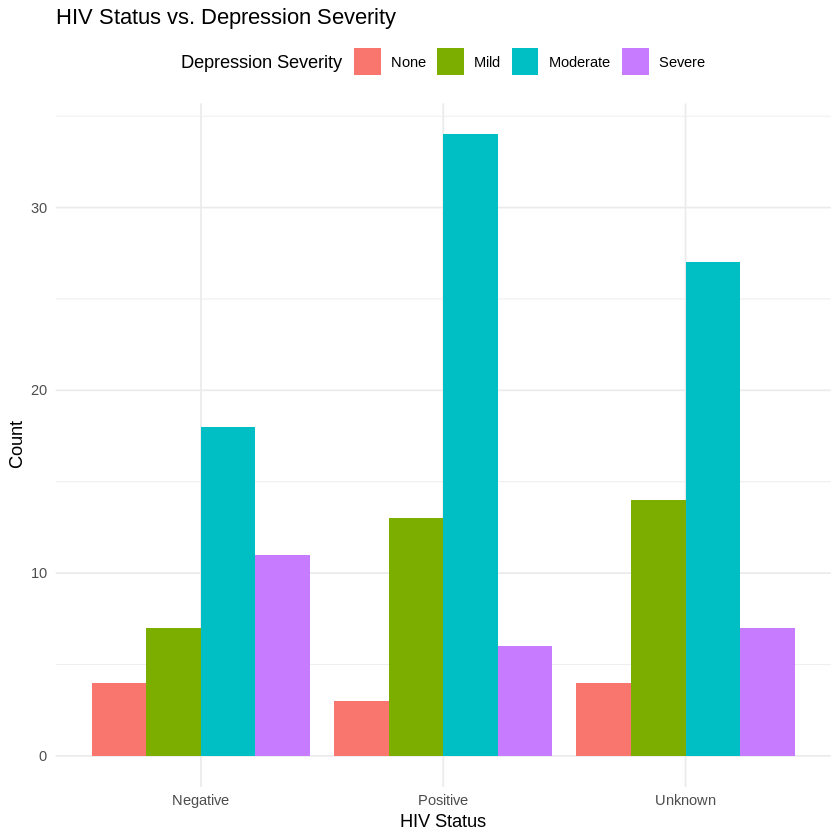

[1] "Skipping Age vs. Number of Presenting Problems analysis and plot due to missing NUMPROB column."


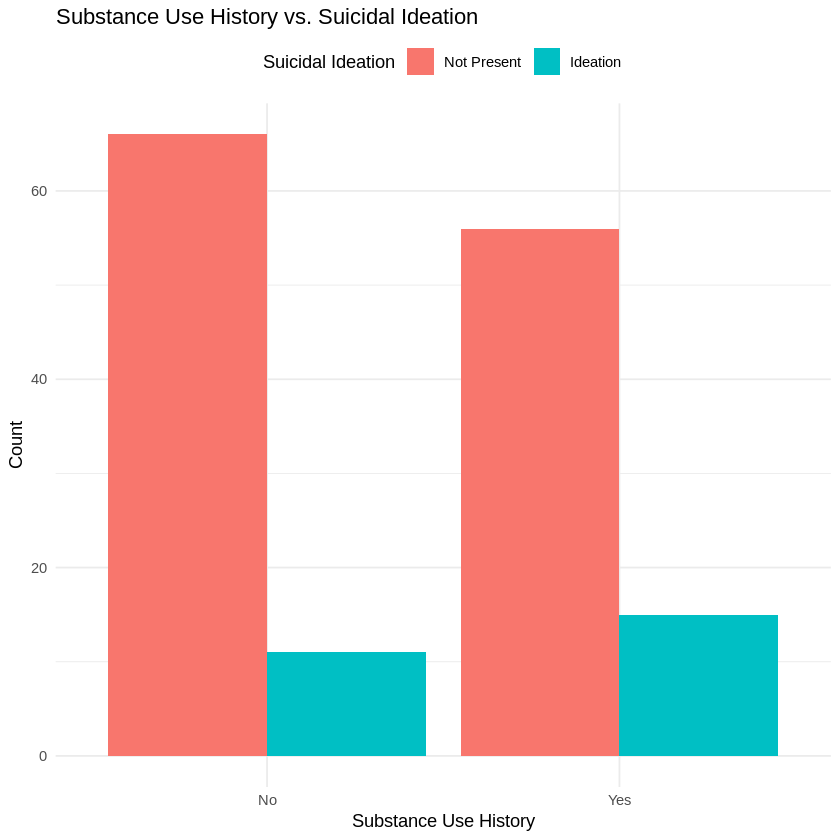

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Check if NUMPROB exists and inspect its contents
if ("NUMPROB" %in% colnames(mydata)) {
  print("NUMPROB column found. Summary of raw values:")
  print(table(mydata$NUMPROB, useNA = "ifany"))
} else {
  print("NUMPROB column not found. Available columns:")
  print(colnames(mydata))
  possible_numprob <- grep("num.*prob|number.*prob", tolower(colnames(mydata)), value = TRUE)
  print("Possible matching columns:")
  print(possible_numprob)
}

# Convert variables to appropriate types
mydata$HIVSTAT <- factor(mydata$HIVSTAT, levels = c(0, 1, 2), labels = c("Negative", "Positive", "Unknown"))
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))
mydata$DRUGEVER <- factor(mydata$DRUGEVER, levels = 0:1, labels = c("No", "Yes"))
mydata$SUICIDE <- factor(mydata$SUICIDE, levels = 1:2, labels = c("Not Present", "Ideation"))

# Convert NUMPROB only if it exists
if ("NUMPROB" %in% colnames(mydata)) {
  mydata$NUMPROB <- as.integer(as.character(mydata$NUMPROB))  # Safe conversion
  print("NUMPROB after conversion:")
  print(table(mydata$NUMPROB, useNA = "ifany"))
} else {
  print("Skipping NUMPROB conversion due to missing column.")
}

# 1. HIV Status vs. Depression Severity (Categorical vs. Categorical)
# Contingency table
hiv_dep_table <- table(mydata$HIVSTAT, mydata$DEP)
print("HIV Status vs. Depression Severity:")
print(hiv_dep_table)

# Chi-square test
hiv_dep_chisq <- chisq.test(hiv_dep_table)
print(hiv_dep_chisq)

# Side-by-side bar plot
ggplot(mydata, aes(x = HIVSTAT, fill = DEP)) +
  geom_bar(position = "dodge") +
  labs(title = "HIV Status vs. Depression Severity",
       x = "HIV Status", y = "Count", fill = "Depression Severity") +
  theme_minimal() +
  theme(legend.position = "top")

# 2. Substance Use History vs. Suicidal Ideation (Categorical vs. Categorical)
# Contingency table
drug_sui_table <- table(mydata$DRUGEVER, mydata$SUICIDE)
print("Substance Use History vs. Suicidal Ideation:")
print(drug_sui_table)

# Chi-square test
drug_sui_chisq <- chisq.test(drug_sui_table)
print(drug_sui_chisq)

# Side-by-side bar plot
ggplot(mydata, aes(x = DRUGEVER, fill = SUICIDE)) +
  geom_bar(position = "dodge") +
  labs(title = "Substance Use History vs. Suicidal Ideation",
       x = "Substance Use History", y = "Count", fill = "Suicidal Ideation") +
  theme_minimal() +
  theme(legend.position = "top")

# 3. Age vs. Number of Presenting Problems (Continuous vs. Ordinal/Continuous)
if ("NUMPROB" %in% colnames(mydata)) {
  # Spearman correlation test
  age_numprob_cor <- cor.test(mydata$AGE, mydata$NUMPROB, method = "spearman", use = "complete.obs")
  print("Age vs. Number of Presenting Problems:")
  print(age_numprob_cor)

  # Scatter plot
  ggplot(mydata, aes(x = AGE, y = NUMPROB)) +
    geom_point(alpha = 0.5) +
    geom_jitter(width = 0.1, height = 0.1) +
    labs(title = "Age vs. Number of Presenting Problems",
         x = "Age", y = "Number of Presenting Problems") +
    theme_minimal()
} else {
  print("Skipping Age vs. Number of Presenting Problems analysis and plot due to missing NUMPROB column.")
}

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert variables to factors
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))
mydata$EMOABUSE <- factor(mydata$EMOABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$SEXABUSE <- factor(mydata$SEXABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$PHYABUSE <- factor(mydata$PHYABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$PROB1 <- as.numeric(mydata$PROB1)
mydata$PROB2 <- as.numeric(mydata$PROB2)
mydata$PROB3 <- as.numeric(mydata$PROB3)
mydata$PROB4 <- as.numeric(mydata$PROB4)

# Subset for participants with depression (PROB1-PROB4 = 1 or DEP > 0)
dep_data <- mydata %>%
  filter(PROB1 == 1 | PROB2 == 1 | PROB3 == 1 | PROB4 == 1 | DEP != "None")

# Check the size of the subset
print("Number of participants with depression:")
print(nrow(dep_data))

# Verify DEP values in subset
print("Depression Severity in subset:")
print(table(dep_data$DEP, useNA = "ifany"))

[1] "Number of participants with depression:"
[1] 137
[1] "Depression Severity in subset:"

    None     Mild Moderate   Severe 
       0       34       79       24 


[1] "Depression Severity vs. History of Emotional Abuse:"
          
           No Yes
  None      0   0
  Mild     23  11
  Moderate 44  35
  Severe   12  12
[1] "Fisher’s Exact Test for DEP vs. EMOABUSE:"

	Fisher's Exact Test for Count Data

data:  dep_ema_table
p-value = 0.3453
alternative hypothesis: two.sided



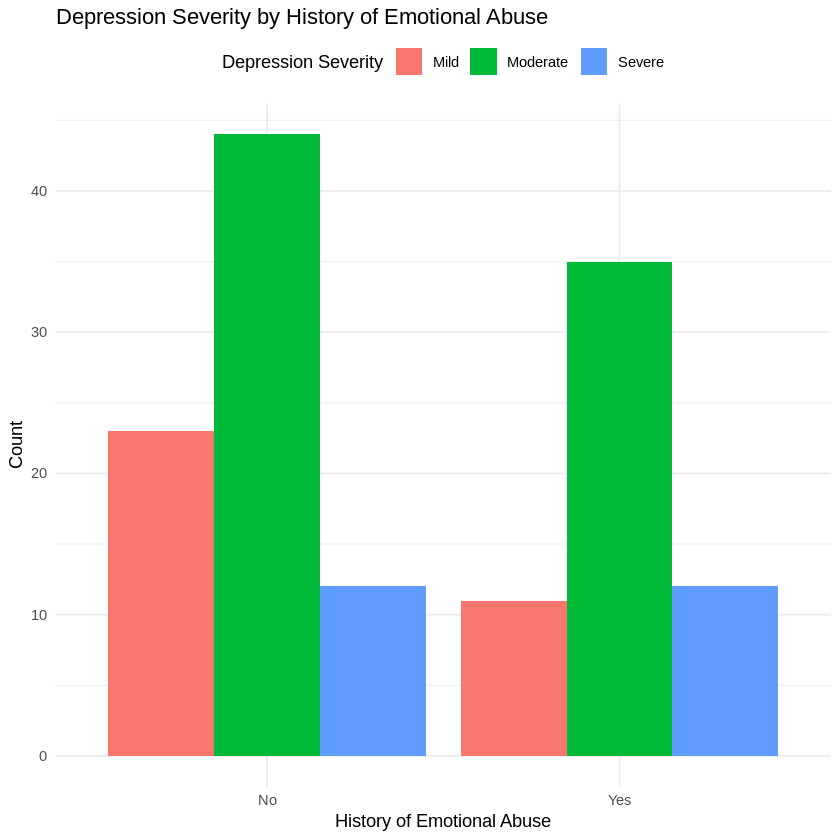

In [ ]:
# 1. Depression Severity vs. History of Emotional Abuse
# Contingency table
dep_ema_table <- table(dep_data$DEP, dep_data$EMOABUSE)
print("Depression Severity vs. History of Emotional Abuse:")
print(dep_ema_table)

# Fisher’s exact test
dep_ema_fisher <- fisher.test(dep_ema_table)
print("Fisher’s Exact Test for DEP vs. EMOABUSE:")
print(dep_ema_fisher)

# Side-by-side bar plot
ggplot(dep_data, aes(x = EMOABUSE, fill = DEP)) +
  geom_bar(position = "dodge") +
  labs(title = "Depression Severity by History of Emotional Abuse",
       x = "History of Emotional Abuse", y = "Count", fill = "Depression Severity") +
  theme_minimal() +
  theme(legend.position = "top")

[1] "Depression Severity vs. History of Sexual Abuse:"
          
           No Yes
  None      0   0
  Mild     27   7
  Moderate 54  25
  Severe   19   5
[1] "Fisher’s Exact Test for DEP vs. SEXABUSE:"

	Fisher's Exact Test for Count Data

data:  dep_sexa_table
p-value = 0.3874
alternative hypothesis: two.sided



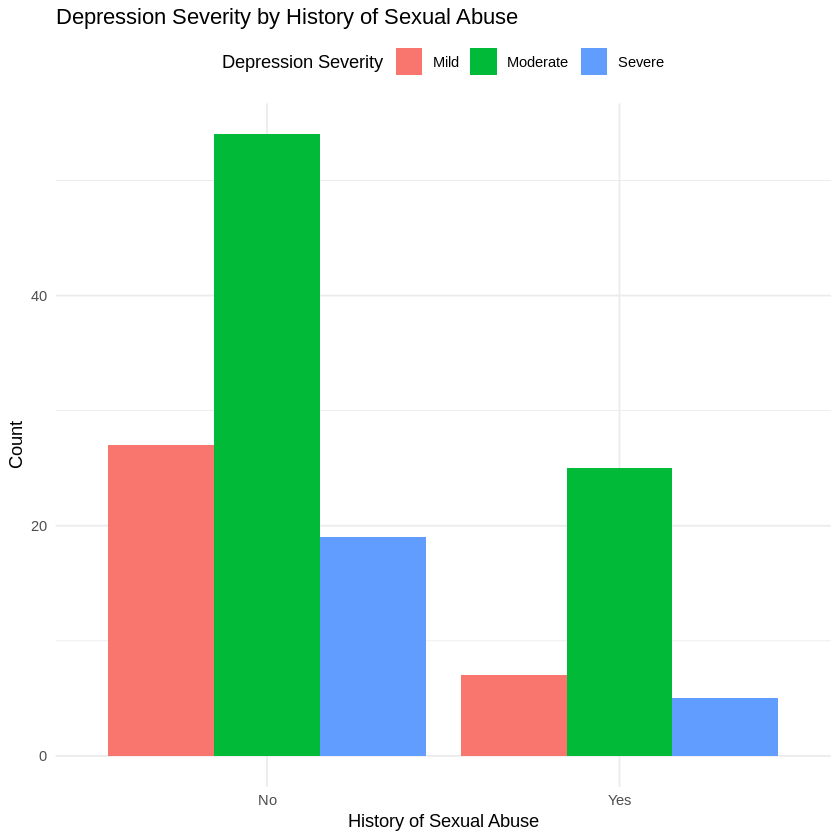

In [ ]:
# 2. Depression Severity vs. History of Sexual Abuse
# Contingency table
dep_sexa_table <- table(dep_data$DEP, dep_data$SEXABUSE)
print("Depression Severity vs. History of Sexual Abuse:")
print(dep_sexa_table)

# Fisher’s exact test
dep_sexa_fisher <- fisher.test(dep_sexa_table)
print("Fisher’s Exact Test for DEP vs. SEXABUSE:")
print(dep_sexa_fisher)

# Side-by-side bar plot
ggplot(dep_data, aes(x = SEXABUSE, fill = DEP)) +
  geom_bar(position = "dodge") +
  labs(title = "Depression Severity by History of Sexual Abuse",
       x = "History of Sexual Abuse", y = "Count", fill = "Depression Severity") +
  theme_minimal() +
  theme(legend.position = "top")

[1] "Depression Severity vs. History of Physical Abuse:"
          
           No Yes
  None      0   0
  Mild     26   8
  Moderate 51  28
  Severe   14  10
[1] "Fisher’s Exact Test for DEP vs. PHYABUSE:"

	Fisher's Exact Test for Count Data

data:  dep_phya_table
p-value = 0.3025
alternative hypothesis: two.sided



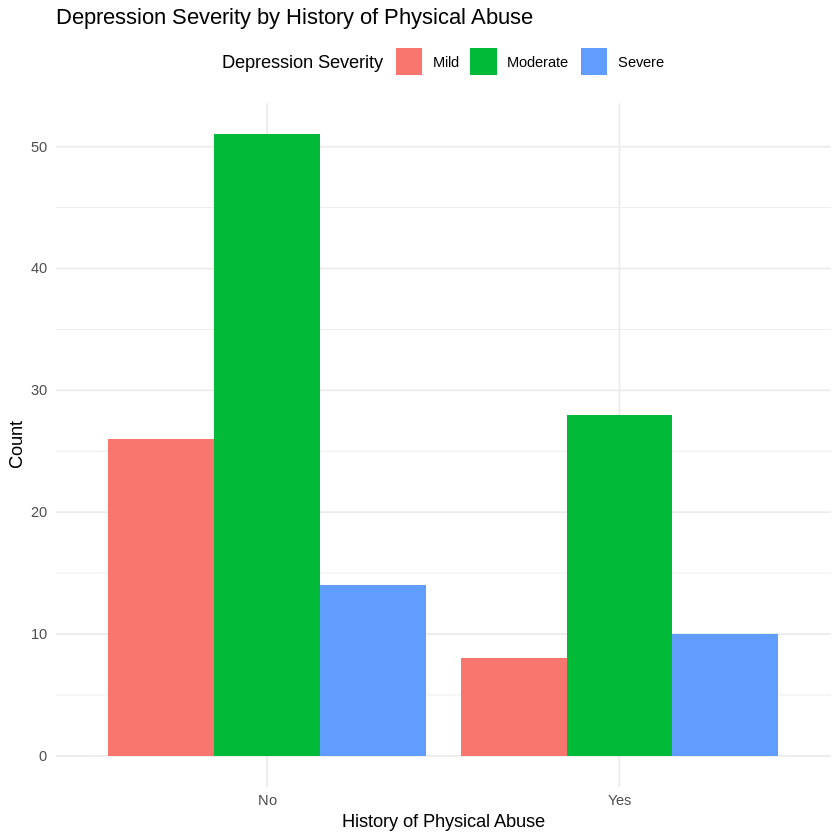

In [ ]:
# 3. Depression Severity vs. History of Physical Abuse
# Contingency table
dep_phya_table <- table(dep_data$DEP, dep_data$PHYABUSE)
print("Depression Severity vs. History of Physical Abuse:")
print(dep_phya_table)

# Fisher’s exact test
dep_phya_fisher <- fisher.test(dep_phya_table)
print("Fisher’s Exact Test for DEP vs. PHYABUSE:")
print(dep_phya_fisher)

# Side-by-side bar plot
ggplot(dep_data, aes(x = PHYABUSE, fill = DEP)) +
  geom_bar(position = "dodge") +
  labs(title = "Depression Severity by History of Physical Abuse",
       x = "History of Physical Abuse", y = "Count", fill = "Depression Severity") +
  theme_minimal() +
  theme(legend.position = "top")

[1] "Summary of AGELGBT:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.0    12.0    10.2    16.0    35.0      43 

[1] "DRUGEVER counts:"



 No Yes 
 77  71 

[1] "Wilcoxon Rank-Sum Test for AGELGBT by DRUGEVER:"

	Wilcoxon rank sum test with continuity correction

data:  AGELGBT by DRUGEVER
W = 1484.5, p-value = 0.4896
alternative hypothesis: true location shift is not equal to 0



Warning message:
“Removed 43 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


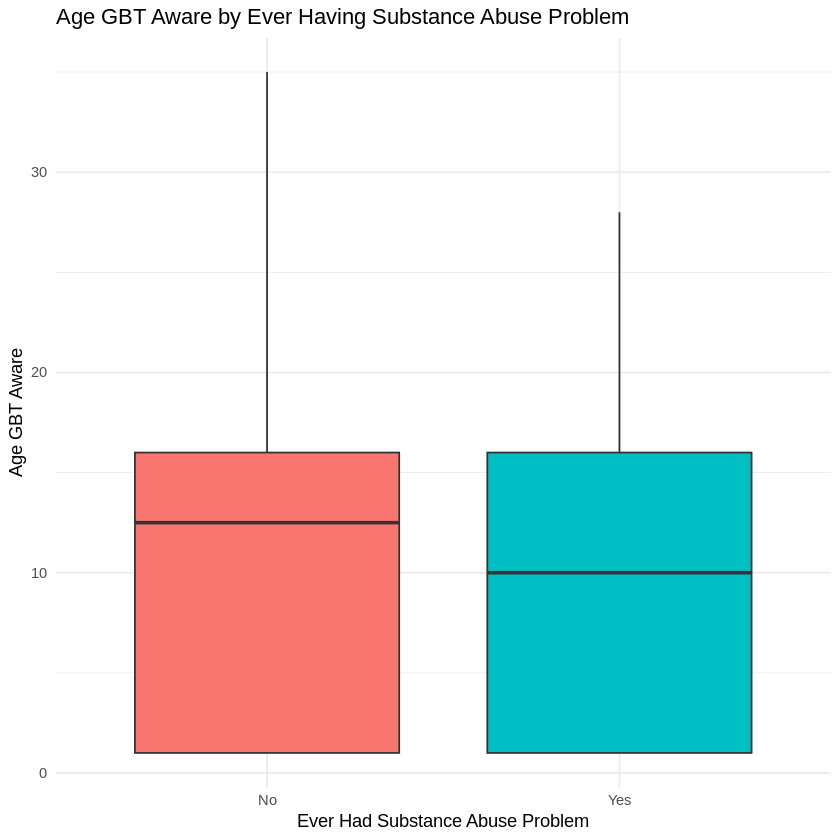

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert DRUGEVER to factor
mydata$DRUGEVER <- factor(mydata$DRUGEVER, levels = 0:1, labels = c("No", "Yes"))

# Verify AGELGBT and DRUGEVER
print("Summary of AGELGBT:")
summary(mydata$AGELGBT)
print("DRUGEVER counts:")
table(mydata$DRUGEVER, useNA = "ifany")

# Wilcoxon rank-sum test
agelgbt_drug_test <- wilcox.test(AGELGBT ~ DRUGEVER, data = mydata, na.action = na.omit)
print("Wilcoxon Rank-Sum Test for AGELGBT by DRUGEVER:")
print(agelgbt_drug_test)

# Side-by-side boxplot
ggplot(mydata, aes(x = DRUGEVER, y = AGELGBT, fill = DRUGEVER)) +
  geom_boxplot() +
  labs(title = "Age GBT Aware by Ever Having Substance Abuse Problem",
       x = "Ever Had Substance Abuse Problem", y = "Age GBT Aware") +
  theme_minimal() +
  theme(legend.position = "none")

[1] "Summary of AGELGBT:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.0    12.0    10.2    16.0    35.0      43 

[1] "Summary of AGE:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   30.00   36.00   36.29   41.00   59.00       1 

Warning message in cor.test.default(mydata$AGELGBT, mydata$AGE, method = "spearman", :
“Cannot compute exact p-value with ties”


[1] "Spearman Correlation Test for AGELGBT vs. AGE:"

	Spearman's rank correlation rho

data:  mydata$AGELGBT and mydata$AGE
S = 132720, p-value = 0.002631
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2920115 



Warning message:
“Removed 44 rows containing missing values or values outside the scale range
(`geom_point()`).”


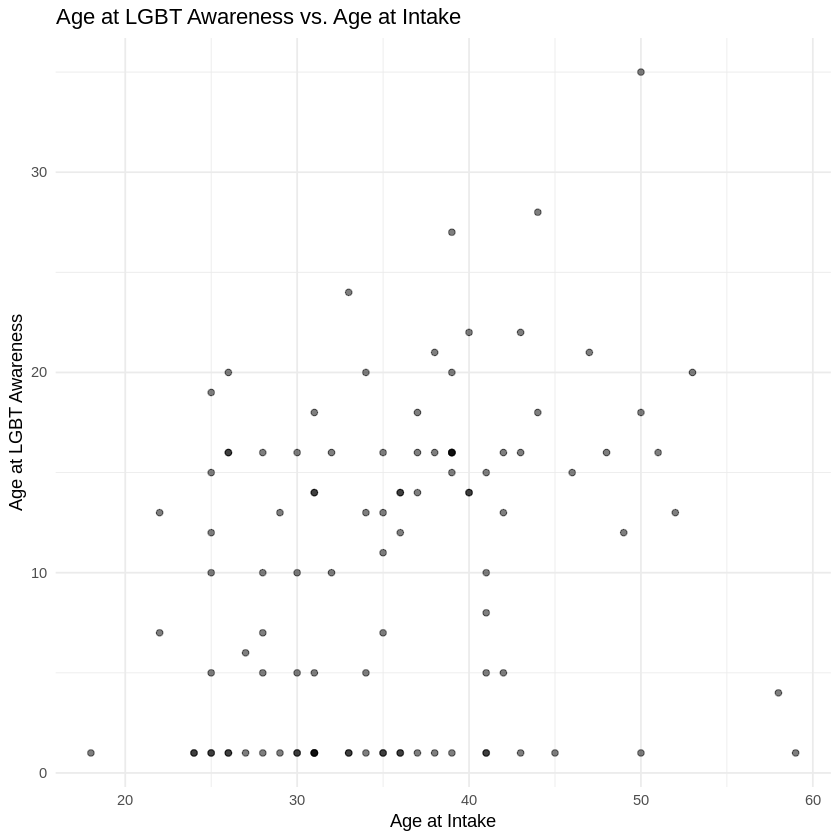

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Verify AGELGBT and AGE
print("Summary of AGELGBT:")
summary(mydata$AGELGBT)
print("Summary of AGE:")
summary(mydata$AGE)

# Spearman correlation test
agelgbt_age_cor <- cor.test(mydata$AGELGBT, mydata$AGE, method = "spearman", use = "complete.obs")
print("Spearman Correlation Test for AGELGBT vs. AGE:")
print(agelgbt_age_cor)

# Scatter plot
ggplot(mydata, aes(x = AGE, y = AGELGBT)) +
  geom_point(alpha = 0.5) +
  labs(title = "Age at LGBT Awareness vs. Age at Intake",
       x = "Age at Intake", y = "Age at LGBT Awareness") +
  theme_minimal()

[1] "Frequency Table for Depression Severity (DEP):"

    None     Mild Moderate   Severe 
      11       34       79       24 
[1] "Percentage Distribution for Depression Severity (DEP):"

    None     Mild Moderate   Severe 
    7.43    22.97    53.38    16.22 
[1] "Number of Missing Values for DEP:"
[1] 0


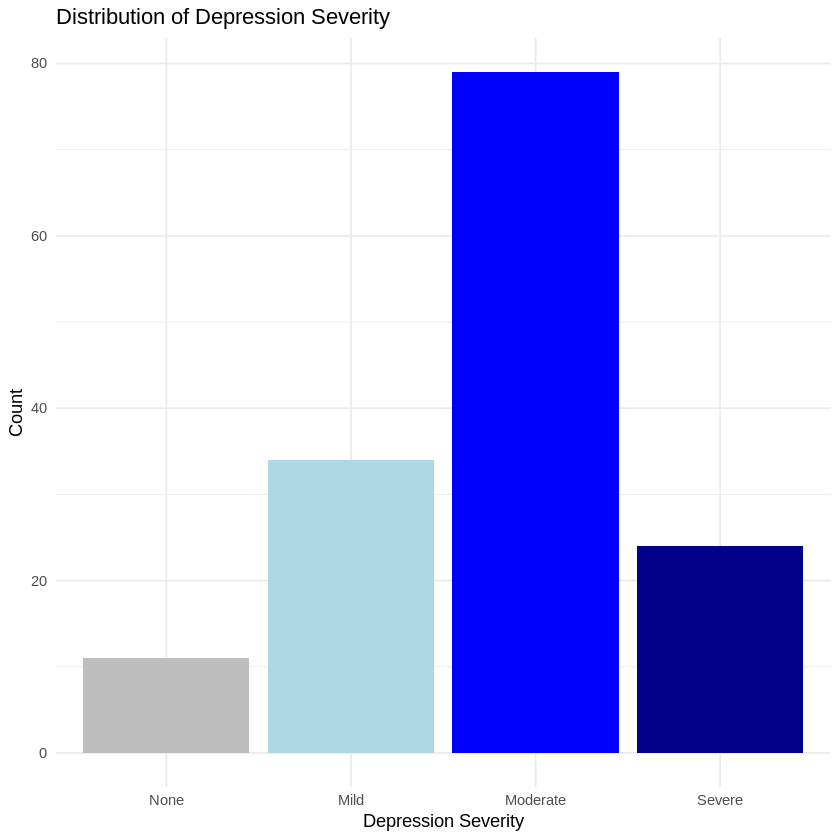

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert DEP to factor with meaningful labels
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))

# Descriptive statistics for DEP
# Frequency table
dep_freq <- table(mydata$DEP, useNA = "ifany")
print("Frequency Table for Depression Severity (DEP):")
print(dep_freq)

# Percentage distribution
dep_percent <- prop.table(table(mydata$DEP, useNA = "ifany")) * 100
print("Percentage Distribution for Depression Severity (DEP):")
print(round(dep_percent, 2))

# Summary of missing values
dep_missing <- sum(is.na(mydata$DEP))
print("Number of Missing Values for DEP:")
print(dep_missing)

# Bar plot
ggplot(mydata, aes(x = DEP, fill = DEP)) +
  geom_bar() +
  labs(title = "Distribution of Depression Severity",
       x = "Depression Severity", y = "Count") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("None" = "grey", "Mild" = "lightblue", "Moderate" = "blue", "Severe" = "darkblue"))

[1] "Frequency Table for Depression Severity (DEP):"

    None     Mild Moderate   Severe 
      11       34       79       24 
[1] "Percentage Distribution for Depression Severity (DEP):"

    None     Mild Moderate   Severe 
    7.43    22.97    53.38    16.22 
[1] "Number of Missing Values for DEP:"
[1] 0


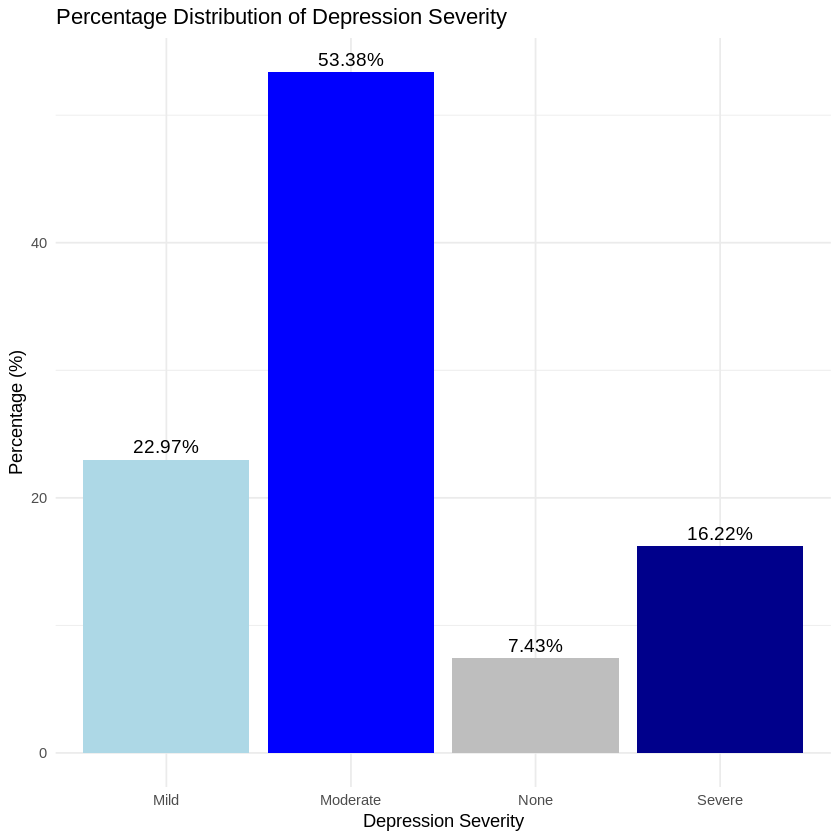

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert DEP to factor with meaningful labels
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))

# Descriptive statistics for DEP
# Frequency table
dep_freq <- table(mydata$DEP, useNA = "ifany")
print("Frequency Table for Depression Severity (DEP):")
print(dep_freq)

# Percentage distribution
dep_percent <- prop.table(table(mydata$DEP, useNA = "ifany")) * 100
print("Percentage Distribution for Depression Severity (DEP):")
print(round(dep_percent, 2))

# Summary of missing values
dep_missing <- sum(is.na(mydata$DEP))
print("Number of Missing Values for DEP:")
print(dep_missing)

# Create a data frame for plotting (with percentages)
dep_plot_data <- data.frame(
  DEP = names(dep_freq),
  Percent = as.numeric(dep_percent)
)

# Bar plot with percentages and labels
ggplot(dep_plot_data, aes(x = DEP, y = Percent, fill = DEP)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.2f%%", Percent)), vjust = -0.5, size = 4) +
  labs(title = "Percentage Distribution of Depression Severity",
       x = "Depression Severity", y = "Percentage (%)") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("None" = "grey", "Mild" = "lightblue", "Moderate" = "blue", "Severe" = "darkblue"))

[1] "Frequency Table for Depression Severity (DEP):"

    None     Mild Moderate   Severe 
      11       34       79       24 
[1] "Percentage Distribution for Depression Severity (DEP):"

    None     Mild Moderate   Severe 
    7.43    22.97    53.38    16.22 
[1] "Number of Missing Values for DEP:"
[1] 0


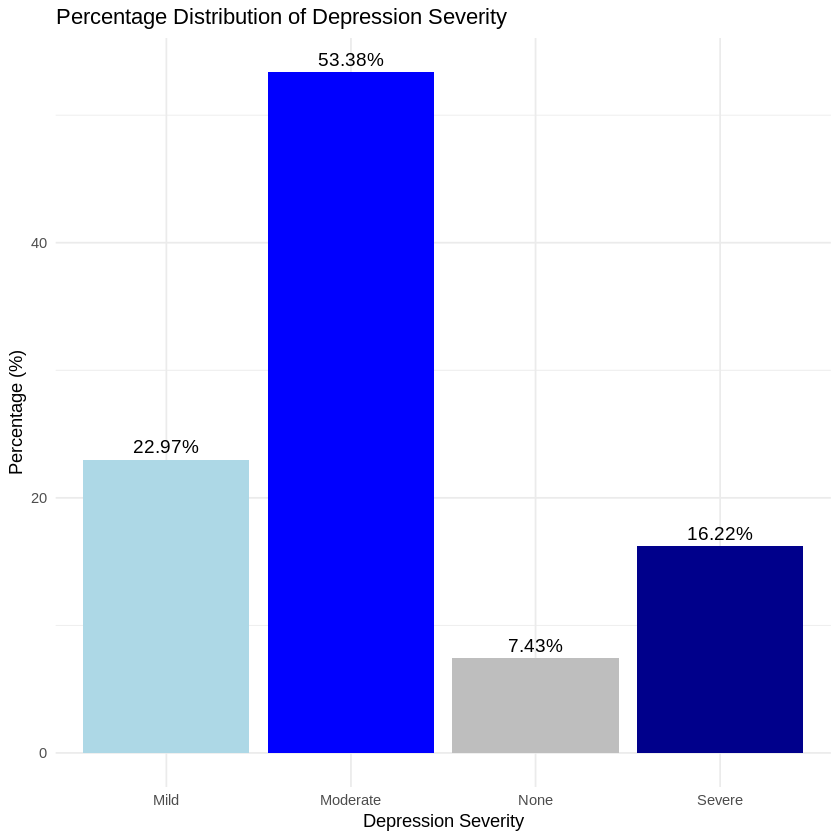

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
library(dplyr)
library(ggplot2)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert DEP to factor with meaningful labels
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))

# Descriptive statistics for DEP
# Frequency table
dep_freq <- table(mydata$DEP, useNA = "ifany")
print("Frequency Table for Depression Severity (DEP):")
print(dep_freq)

# Percentage distribution
dep_percent <- prop.table(table(mydata$DEP, useNA = "ifany")) * 100
print("Percentage Distribution for Depression Severity (DEP):")
print(round(dep_percent, 2))

# Summary of missing values
dep_missing <- sum(is.na(mydata$DEP))
print("Number of Missing Values for DEP:")
print(dep_missing)

# Create a data frame for plotting (with percentages)
dep_plot_data <- data.frame(
  DEP = names(dep_freq),
  Percent = as.numeric(dep_percent)
)

# Bar plot with percentages and labels
ggplot(dep_plot_data, aes(x = DEP, y = Percent, fill = DEP)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.2f%%", Percent)), vjust = -0.5, size = 4) +
  labs(title = "Percentage Distribution of Depression Severity",
       x = "Depression Severity", y = "Percentage (%)") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("None" = "grey", "Mild" = "lightblue", "Moderate" = "blue", "Severe" = "darkblue"))

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("forestplot")) install.packages("forestplot")
library(dplyr)
library(ggplot2)
library(forestplot)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert variables
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))
mydata$EMOABUSE <- factor(mydata$EMOABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$SEXABUSE <- factor(mydata$SEXABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$PHYABUSE <- factor(mydata$PHYABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$DRUGEVER <- factor(mydata$DRUGEVER, levels = 0:1, labels = c("No", "Yes"))

# Dichotomize DEP (Severe = 1, Non-Severe = 0)
mydata$DEP_binary <- as.numeric(mydata$DEP == "Severe")
print("Frequency Table for Binary DEP (Severe vs. Non-Severe):")
print(table(mydata$DEP_binary, useNA = "ifany"))

# Verify predictors
print("Predictor Summaries:")
lapply(list(EMOABUSE = mydata$EMOABUSE, SEXABUSE = mydata$SEXABUSE,
            PHYABUSE = mydata$PHYABUSE, DRUGEVER = mydata$DRUGEVER), table, useNA = "ifany")

# Fit univariate logistic regressions
predictors <- c("EMOABUSE", "SEXABUSE", "PHYABUSE", "DRUGEVER")
results <- lapply(predictors, function(pred) {
  formula <- as.formula(paste("DEP_binary ~", pred))
  model <- glm(formula, data = mydata, family = binomial(link = "logit"))
  coef_summary <- summary(model)$coefficients
  or <- exp(coef_summary[2, 1])  # Odds ratio for predictor (Yes vs. No)
  ci <- exp(confint(model)[2, ])  # 95% CI for predictor
  p_value <- coef_summary[2, 4]   # P-value
  return(data.frame(
    Predictor = pred,
    OR = or,
    Lower_CI = ci[1],
    Upper_CI = ci[2],
    P_value = p_value
  ))
})

# Combine results
results_df <- do.call(rbind, results)
print("Logistic Regression Results:")
print(results_df)

# Prepare data for forest plot
mean <- results_df$OR
lower <- results_df$Lower_CI
upper <- results_df$Upper_CI
labels <- results_df$Predictor
table_text <- cbind(
  c("Predictor", labels),
  c("OR", sprintf("%.2f", mean)),
  c("95% CI", sprintf("(%.2f, %.2f)", lower, upper)),
  c("P-value", sprintf("%.3f", results_df$P_value))
)

# Forest plot
forestplot(
  table_text,
  rbind(NA, mean),  # NA for header row
  rbind(NA, lower),
  rbind(NA, upper),
  title = "Odds Ratios for Severe Depression by Predictors",
  xlab = "Odds Ratio (95% CI)",
  zero = 1,  # Reference line at OR = 1
  boxsize = 0.2,
  col = fpColors(box = "blue", line = "black", summary = "blue"),
  ci.vertices = TRUE,
  ci.vertices.height = 0.1,
  txt_gp = fpTxtGp(label = gpar(cex = 0.9), xlab = gpar(cex = 1))
)

Loading required package: forestplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forestplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘abind’


Loading required package: grid

Loading required package: checkmate

Loading required package: abind



[1] "Frequency Table for Binary DEP (Severe vs. Non-Severe):"

  0   1 
124  24 
[1] "Predictor Summaries:"


$EMOABUSE

 No Yes 
 88  60 

$SEXABUSE

 No Yes 
108  40 

$PHYABUSE

 No Yes 
102  46 

$DRUGEVER

 No Yes 
 77  71 


Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "Logistic Regression Results:"
       Predictor        OR  Lower_CI Upper_CI   P_value
2.5 %   EMOABUSE 1.5833333 0.6531663 3.844213 0.3049576
2.5 %1  SEXABUSE 0.6691729 0.2090870 1.814941 0.4575744
2.5 %2  PHYABUSE 1.7460317 0.6947371 4.271971 0.2245258
2.5 %3  DRUGEVER 2.0238095 0.8363846 5.147693 0.1242540


ERROR: Error in prepLabelText(labeltext = coreData$labeltext, nr = nrow(coreData$estimates)): You have provided 2 rows in your mean arguement while the labels have 5 rows


[1] "Frequency Table for Binary DEP (Severe vs. Non-Severe):"

  0   1 
124  24 
[1] "Predictor Summaries:"


$EMOABUSE

 No Yes 
 88  60 

$SEXABUSE

 No Yes 
108  40 

$PHYABUSE

 No Yes 
102  46 

$DRUGEVER

 No Yes 
 77  71 


Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "Logistic Regression Results:"
       Predictor        OR  Lower_CI Upper_CI   P_value
2.5 %   EMOABUSE 1.5833333 0.6531663 3.844213 0.3049576
2.5 %1  SEXABUSE 0.6691729 0.2090870 1.814941 0.4575744
2.5 %2  PHYABUSE 1.7460317 0.6947371 4.271971 0.2245258
2.5 %3  DRUGEVER 2.0238095 0.8363846 5.147693 0.1242540


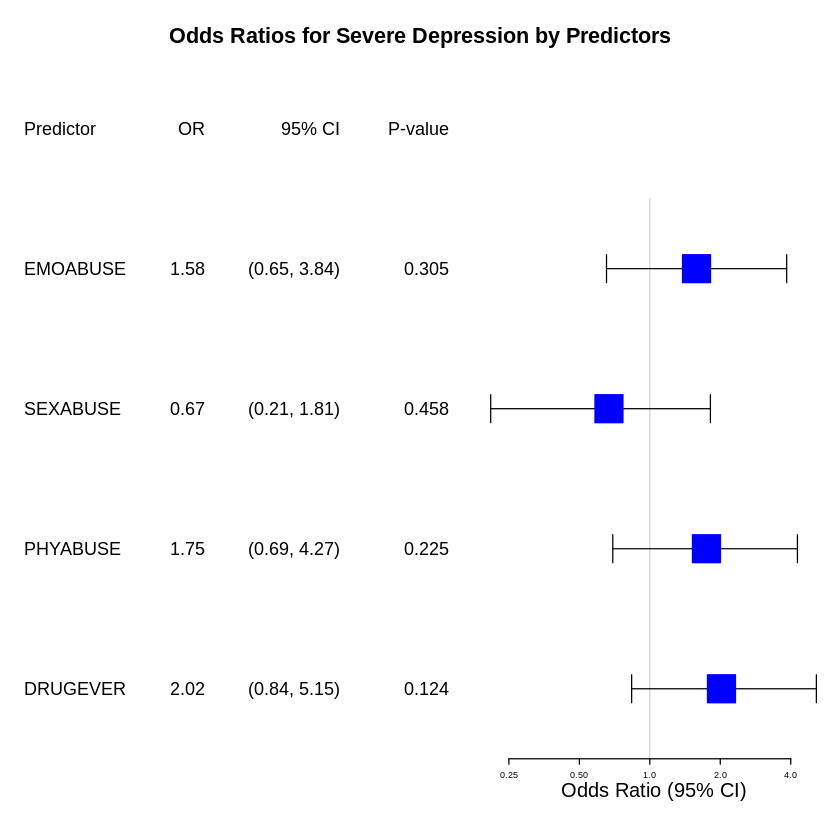

In [ ]:
# Load required packages
if (!require("dplyr")) install.packages("dplyr")
if (!require("forestplot")) install.packages("forestplot")
library(dplyr)
library(forestplot)

# Load the data
mydata <- read.csv("LGBTData.csv")

# Replace missing/not applicable codes with NA
mydata[mydata == 999] <- NA
mydata[mydata == 888] <- NA

# Convert variables
mydata$DEP <- factor(mydata$DEP, levels = c(0, 1, 2, 3), labels = c("None", "Mild", "Moderate", "Severe"))
mydata$EMOABUSE <- factor(mydata$EMOABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$SEXABUSE <- factor(mydata$SEXABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$PHYABUSE <- factor(mydata$PHYABUSE, levels = 0:1, labels = c("No", "Yes"))
mydata$DRUGEVER <- factor(mydata$DRUGEVER, levels = 0:1, labels = c("No", "Yes"))

# Dichotomize DEP (Severe = 1, Non-Severe = 0)
mydata$DEP_binary <- as.numeric(mydata$DEP == "Severe")
print("Frequency Table for Binary DEP (Severe vs. Non-Severe):")
print(table(mydata$DEP_binary, useNA = "ifany"))

# Verify predictors
print("Predictor Summaries:")
lapply(list(EMOABUSE = mydata$EMOABUSE, SEXABUSE = mydata$SEXABUSE,
            PHYABUSE = mydata$PHYABUSE, DRUGEVER = mydata$DRUGEVER), table, useNA = "ifany")

# Fit univariate logistic regressions
predictors <- c("EMOABUSE", "SEXABUSE", "PHYABUSE", "DRUGEVER")
results <- lapply(predictors, function(pred) {
  formula <- as.formula(paste("DEP_binary ~", pred))
  model <- glm(formula, data = mydata, family = binomial(link = "logit"))
  coef_summary <- summary(model)$coefficients
  or <- exp(coef_summary[2, 1])  # Odds ratio for predictor (Yes vs. No)
  ci <- exp(confint(model)[2, ])  # 95% CI for predictor
  p_value <- coef_summary[2, 4]   # P-value
  return(data.frame(
    Predictor = pred,
    OR = or,
    Lower_CI = ci[1],
    Upper_CI = ci[2],
    P_value = p_value
  ))
})

# Combine results
results_df <- do.call(rbind, results)
print("Logistic Regression Results:")
print(results_df)

# Prepare data for forest plot
mean <- results_df$OR
lower <- results_df$Lower_CI
upper <- results_df$Upper_CI
labels <- results_df$Predictor

# Create table text for forest plot
table_text <- cbind(
  c("Predictor", as.character(labels)),
  c("OR", sprintf("%.2f", mean)),
  c("95% CI", sprintf("(%.2f, %.2f)", lower, upper)),
  c("P-value", sprintf("%.3f", results_df$P_value))
)

# Forest plot
forestplot(
  labeltext = table_text,
  mean = c(NA, mean),
  lower = c(NA, lower),
  upper = c(NA, upper),
  title = "Odds Ratios for Severe Depression by Predictors",
  xlab = "Odds Ratio (95% CI)",
  zero = 1,
  boxsize = 0.2,
  col = fpColors(box = "blue", line = "black", summary = "blue"),
  ci.vertices = TRUE,
  ci.vertices.height = 0.1,
  txt_gp = fpTxtGp(label = gpar(cex = 0.9), xlab = gpar(cex = 1)),
  xlog = TRUE  # Log scale for ORs
)